In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Importing dataset 

In [6]:
# Project folder path 
path = r'C:\Users\hp\08-2024 Instacart Basket Analysis'
# Import customers merged dataset
df = pd.read_pickle(os.path.join(path,'Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [11]:
df.shape

(32404161, 33)

# 2. Histogram of the “order_hour_of_day” column

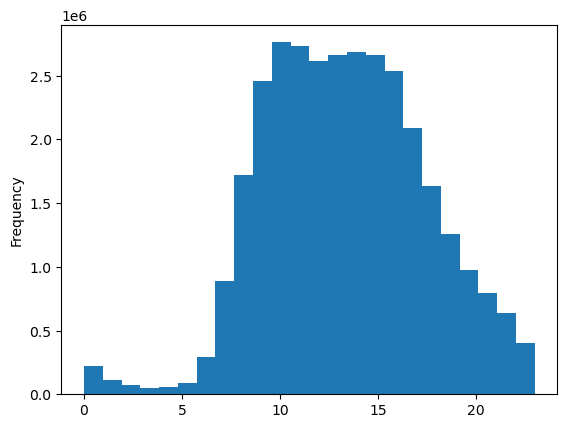

In [17]:
histo = df['order_hour_of_day'].plot.hist(bins = 24)

#### Insights:
* The plot shows the frequency of orders placed during each hour of the day
* The histogram shows a clear peak in the middle of the day, indicating that most orders are placed between late morning and early afternoon.
* There are fewer orders during the early morning hours (0-6 AM) and late evening (after 8 PM).

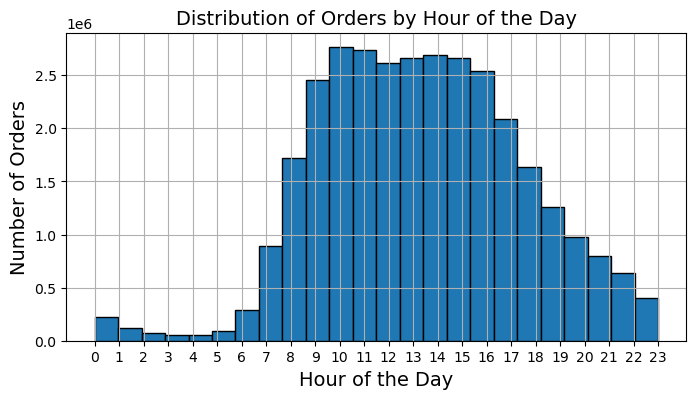

In [50]:
# Enhanced histogram
plt.figure(figsize=(8, 4))
plt.hist(df['order_hour_of_day'], bins=24, edgecolor='black')
plt.title('Distribution of Orders by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(range(24))  # Show each hour on x-axis
plt.grid(True)  # Add gridlines

### The busiest hours of the day are 8am-4pm

# 3. Bar Chart 

Text(0.5, 1.0, 'Distribution of Orders by Loyalty Flag')

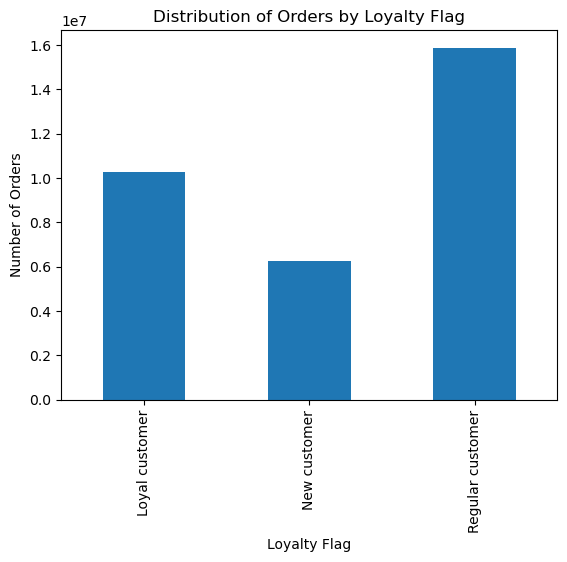

In [62]:
barchart = df['loyalty_flag'].value_counts().sort_index().plot.bar()
barchart.set_xlabel('Loyalty Flag')
barchart.set_ylabel('Number of Orders')
barchart.set_title('Distribution of Orders by Loyalty Flag')

# 4. Line Chart

### 4.1 Checking whether there’s a difference in expenditure depending on the hour of the day

In [67]:
# Create a random sample by generating a seed
np.random.seed(4)
# Create a dev list based on the data split (70/30)
dev = np.random.rand(len(df)) <= 0.7

In [69]:
#Store 70% of the sample in the dataframe big 
big = df[dev]
#Store 30% of the sample in the dataframe small 
small = df[~dev]

In [71]:
#Checking
len(df)

32404161

In [73]:
# Compare the dataframe length to the sum of the big and small samples
len(big) + len(small)

32404161

In [77]:
#Creating df_2 that contains only prices and order hour of day columns from small subset 
df_2 = small[['order_hour_of_day','prices']]
#Check 
df_2.head()

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,4.3
6,9,4.3
10,9,4.0


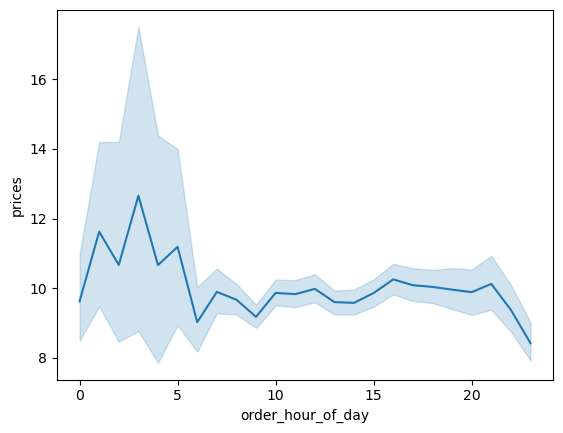

In [81]:
#Creating the chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### 4.2 Determining whether there’s a connection between age and family situation

In [90]:
#Creating df_3 that contains only age and number of dependents columns from small subset 
df_3 = small[['Age','Number_of_Dependents']]
#Check 
df_3.head()

,Age,Number_of_Dependents
0,48,3
2,48,3
3,48,3
6,48,3
10,48,3


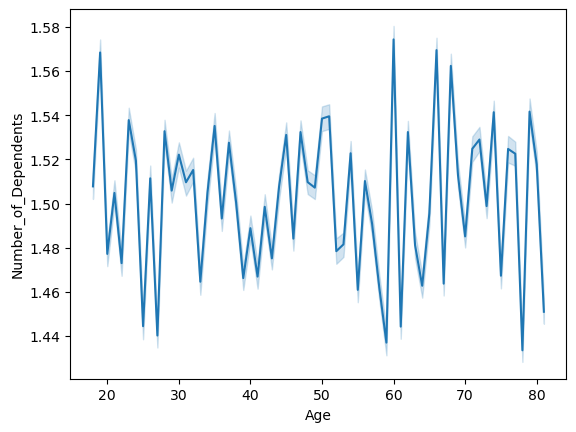

In [101]:
#Creating the chart
line2 = sns.lineplot(data = df_3, x = 'Age',y = 'Number_of_Dependents')

### Insights: 
* The plot exhibits a lot of fluctuations across all age groups. This suggests that there isn't a consistent pattern or trend in the number of dependents as age increases. The number of dependents seems to vary widely across individuals of different ages.
* There's no evident upward or downward trend in the data --> No clear trend

# 5. Scatterplot 

### Exploring whether there’s a connection between age and spending power (income)

<Axes: xlabel='Age', ylabel='Income'>

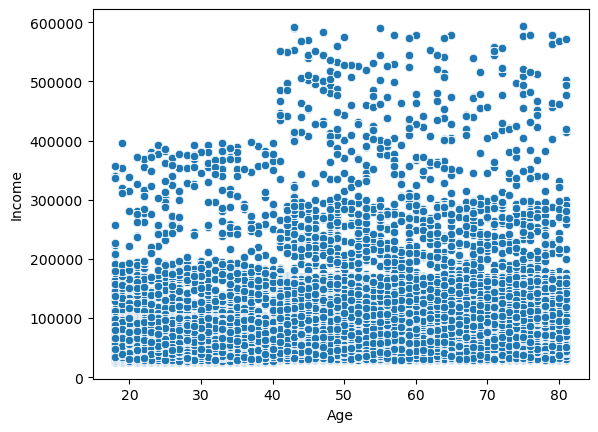

In [97]:
sns.scatterplot(x = 'Age', y = 'Income',data = df)

### Insights : 
* There are two noticeable clusters of income:
1. A dense cluster below the 200,000 income mark, which persists across all age groups.
2. A sparser cluster above 200,000, with incomes ranging up to 600,000. This upper cluster becomes more prominent as age increases, particularly from age 40 onward.

# 6. Exporting Visualizations 

In [103]:
histo.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'orders_by_hour.png'))

In [40]:
barchart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_flag.png'))

In [105]:
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_hour.png'))

In [107]:
line2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_ndependts.png'))

In [ ]:
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spending_power_age.png'))